## Seeding Date detection using the Township level thesholds

#### Get the township level thresholds of the climate data 

In [1]:
import pandas as pd

### Import daily climate data

In [2]:
df_climate =pd.read_parquet('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/V_4.0/climate_data_1987_2024_apr_oct_townships.parquet')
df_climate


,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,1987-04-01,0.000000,-1.272552,-1.172211,-1.207642,-0.684418,-0.658295,-0.672455,Moist Black,1987,0.000000
1,1-1-E1,1987-04-02,0.000000,-1.349457,-1.167816,-1.263977,-0.715179,-0.684906,-0.698578,Moist Black,1987,0.000000
2,1-1-E1,1987-04-03,0.000000,-1.357513,-1.247162,-1.298187,-0.743988,-0.716644,-0.729431,Moist Black,1987,0.000000
3,1-1-E1,1987-04-04,2.092224,-1.267914,-1.041107,-1.188080,-0.760345,-0.746918,-0.754333,Moist Black,1987,2.092224
4,1-1-E1,1987-04-05,4.157913,-1.002533,0.300446,-0.692078,-0.760101,-0.726898,-0.750580,Moist Black,1987,6.250137
...,...,...,...,...,...,...,...,...,...,...,...,...
61128239,S-L-WS,2024-10-27,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128240,S-L-WS,2024-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128241,S-L-WS,2024-10-29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128242,S-L-WS,2024-10-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439


In [4]:
df_climate['Township'].nunique()

7517

In [5]:
df_climate.columns

Index(['Township', 'Date', 'GDD', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean', 'SoilType', 'Year', 'Cumulative_GDD'],
      dtype='object')

#### Get the 10 locations with actual seeding dates selected as the testing dataset

In [6]:
df_10_actual_test = pd.read_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/V_4.0/actual_seeding_dates_10locations_2024.csv')

#### Get the 30 locations with actual seeding dates selected as the testing dataset

In [7]:
df_30_actual_test = pd.read_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/input/V_4.0/actual_seeding_dates_30locations_2024.csv')

##### Groupby soil type and get the min, max and average of the accumulated GDD and the min, mean, max soil temp layer 1 and layer 2

In [8]:
import numpy as np
import pandas as pd

df = df_30_actual_test.copy()

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Columns you intend to aggregate
agg_columns = [
    'Soil_temp_l1_min', 'Soil_temp_l1_max', 'Soil_temp_l1_mean',
    'Soil_temp_l2_min', 'Soil_temp_l2_max', 'Soil_temp_l2_mean',
    'Cumulative_GDD'
]

# Ensure all agg columns are numeric (convert errors to NaN if needed)
df[agg_columns] = df[agg_columns].apply(pd.to_numeric, errors='coerce')

# Now group by SoilType and safely aggregate
climate_thresholds = df.groupby('SoilType')[agg_columns].agg(['min', 'max', 'mean'])

# Optional: Save to CSV
climate_thresholds.to_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_climate_thresholds_by_7_soiltypes_30_locations_2024.csv')

# Display
print(climate_thresholds)

climate_thresholds

                 Soil_temp_l1_min                      Soil_temp_l1_max  \
                              min        max      mean              min   
SoilType                                                                  
Black                    4.793854  13.194733  8.066966        14.810944   
Brown                    8.001617   9.641266  9.033763        18.694000   
Dark Brown               4.593170   6.847321  5.720245        14.080231   
Dark Gray                0.753082   6.107330  3.169423        12.777985   
Gray                     5.711823   5.711823  5.711823        15.201324   
Moist Black              4.353912   8.265045  5.329417        11.432770   
Moist Dark Brown         5.770905   7.876373  6.750071        17.225006   

                                       Soil_temp_l1_mean             \
                        max       mean               min        max   
SoilType                                                              
Black             19.915924  18.0632

Soil_temp_l1_min                      Soil_temp_l1_max  \
                              min        max      mean              min   
SoilType                                                                  
Black                    4.793854  13.194733  8.066966        14.810944   
Brown                    8.001617   9.641266  9.033763        18.694000   
Dark Brown               4.593170   6.847321  5.720245        14.080231   
Dark Gray                0.753082   6.107330  3.169423        12.777985   
Gray                     5.711823   5.711823  5.711823        15.201324   
Moist Black              4.353912   8.265045  5.329417        11.432770   
Moist Dark Brown         5.770905   7.876373  6.750071        17.225006   

                                       Soil_temp_l1_mean             \
                        max       mean               min        max   
SoilType                                                              
Black             19.915924  18.063222          9.578735  15.909973   
Brown             20.396637  19.747467         14.025879  15.039246   
Dark Brown        20.467682  17.273957          9.371582  13.080139   
Dark Gray         15.603912  14.481232          6.622467  10.111938   
Gray              15.201324  15.201324          9.854065   9.854065   
Moist Black       16.768951  14.478180          7.059845  10.771545   
Moist Dark Brown  17.818756  17.511546         11.272217  12.149567   

                            Soil_temp_l2_min  ...            Soil_temp_l2_max  \
                       mean              min  ...       mean              min   
SoilType                                      ...                               
Black             12.699724         7.184967  ...  10.199697         9.756256   
Brown             14.507680        10.958893  ...  11.200755        13.654694   
Dark Brown        11.225860         7.541901  ...   8.320953         9.610992   
Dark Gray          8.647786         3.153229  ...   5.015004         5.263092   
Gray               9.854065         6.730866  ...   6.730866         9.340973   
Moist Black        9.479991         5.625885  ...   7.190704         7.178131   
Moist Dark Brown  11.816701         8.341705  ...   9.077138        11.234283   

                                       Soil_temp_l2_mean             \
                        max       mean               min        max   
SoilType                                                              
Black             14.405426  12.819624          8.277466  13.872742   
Brown             14.002838  13.844961         12.515625  12.640289   
Dark Brown        12.783356  11.197174          8.645691  10.623291   
Dark Gray          8.033844   7.006663          4.209900   7.440124   
Gray               9.340973   9.340973          7.693817   7.693817   
Moist Black       10.408112   9.386993          6.218811   8.970367   
Moist Dark Brown  12.169830  11.643463          9.654663  10.669312   

                            Cumulative_GDD                          
                       mean            min         max        mean  
SoilType                                                            
Black             11.374848      87.992341  226.787199  186.172271  
Brown             12.564270     109.123125  168.885406  139.930273  
Dark Brown         9.634491     100.886580  120.598923  110.742752  
Dark Gray          5.993032      35.638274   51.304824   41.480743  
Gray               7.693817     122.374284  122.374284  122.374284  
Moist Black        8.215337     128.728363  164.599259  149.946340  
Moist Dark Brown  10.302907     133.386475  143.280929  138.458100  

[7 rows x 21 columns]

In [9]:
climate_thresholds.columns

MultiIndex([( 'Soil_temp_l1_min',  'min'),
            ( 'Soil_temp_l1_min',  'max'),
            ( 'Soil_temp_l1_min', 'mean'),
            ( 'Soil_temp_l1_max',  'min'),
            ( 'Soil_temp_l1_max',  'max'),
            ( 'Soil_temp_l1_max', 'mean'),
            ('Soil_temp_l1_mean',  'min'),
            ('Soil_temp_l1_mean',  'max'),
            ('Soil_temp_l1_mean', 'mean'),
            ( 'Soil_temp_l2_min',  'min'),
            ( 'Soil_temp_l2_min',  'max'),
            ( 'Soil_temp_l2_min', 'mean'),
            ( 'Soil_temp_l2_max',  'min'),
            ( 'Soil_temp_l2_max',  'max'),
            ( 'Soil_temp_l2_max', 'mean'),
            ('Soil_temp_l2_mean',  'min'),
            ('Soil_temp_l2_mean',  'max'),
            ('Soil_temp_l2_mean', 'mean'),
            (   'Cumulative_GDD',  'min'),
            (   'Cumulative_GDD',  'max'),
            (   'Cumulative_GDD', 'mean')],
           )

In [10]:
# Cleaning and organizing the table properly

df = climate_thresholds.copy()

# Make sure first cell is treated as string
first_cell = str(df.iloc[0, 1])

# Now check properly
if "min" in first_cell or "max" in first_cell or "mean" in first_cell:
    # First row is descriptors, drop it
    df_clean = df.drop(index=[0, 1]).reset_index(drop=True)
else:
    # Already clean
    df_clean = df.copy()

# Rename columns
df_clean.columns = [
    
    "Soil_temp_l1_min_min", "Soil_temp_l1_min_max", "Soil_temp_l1_min_mean",
    "Soil_temp_l1_max_min", "Soil_temp_l1_max_max", "Soil_temp_l1_max_mean",
    "Soil_temp_l1_mean_min", "Soil_temp_l1_mean_max", "Soil_temp_l1_mean_mean",
    "Soil_temp_l2_min_min", "Soil_temp_l2_min_max", "Soil_temp_l2_min_mean",
    "Soil_temp_l2_max_min", "Soil_temp_l2_max_max", "Soil_temp_l2_max_mean",
    "Soil_temp_l2_mean_min", "Soil_temp_l2_mean_max", "Soil_temp_l2_mean_mean",
    "Cumulative_GDD_min", "Cumulative_GDD_max", "Cumulative_GDD_mean"
]

# Convert all except 'SoilType' to numeric
for col in df_clean.columns[1:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')



In [11]:
import pandas as pd

def clean_soil_thresholds(df_raw):
    """
    Cleans a raw climate thresholds DataFrame and returns a dictionary of soil type thresholds.

    Args:
        df_raw (pd.DataFrame): Raw DataFrame as read from the CSV.

    Returns:
        dict: A dictionary mapping each SoilType to its climate thresholds.
    """

    df = df_raw.copy()

    # 1. Check if first rows are descriptors like 'min', 'max', 'mean'
    try:
        first_cell = str(df.iloc[0, 1]).lower()
    except IndexError:
        raise ValueError("DataFrame appears empty or not structured correctly.")
    
    if "min" in first_cell or "max" in first_cell or "mean" in first_cell:
        # Drop the first two rows: descriptor + "SoilType" row
        df = df.drop(index=[0, 1]).reset_index(drop=True)
    
    # 2. Rename columns properly
    df.columns = [
        "SoilType",
        "Soil_temp_l1_min_min", "Soil_temp_l1_min_max", "Soil_temp_l1_min_mean",
        "Soil_temp_l1_max_min", "Soil_temp_l1_max_max", "Soil_temp_l1_max_mean",
        "Soil_temp_l1_mean_min", "Soil_temp_l1_mean_max", "Soil_temp_l1_mean_mean",
        "Soil_temp_l2_min_min", "Soil_temp_l2_min_max", "Soil_temp_l2_min_mean",
        "Soil_temp_l2_max_min", "Soil_temp_l2_max_max", "Soil_temp_l2_max_mean",
        "Soil_temp_l2_mean_min", "Soil_temp_l2_mean_max", "Soil_temp_l2_mean_mean",
        "Cumulative_GDD_min", "Cumulative_GDD_max", "Cumulative_GDD_mean"
    ]

    # 3. Convert numeric columns
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 4. Build the dictionary
    soil_thresholds_dict = {
        row["SoilType"]: row.drop("SoilType").to_dict()
        for _, row in df.iterrows()
    }

    return soil_thresholds_dict


In [35]:
# Load your CSV
df_thresholds = pd.read_csv('/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_climate_thresholds_by_7_soiltypes_30_locations_2024.csv')

# Clean and get dictionary
soil_thresholds = clean_soil_thresholds(df_thresholds)

# Now ready to use:
print(soil_thresholds["Black"])

{'Soil_temp_l1_min_min': 4.7938538, 'Soil_temp_l1_min_max': 13.194733, 'Soil_temp_l1_min_mean': 8.066965766666666, 'Soil_temp_l1_max_min': 14.810944, 'Soil_temp_l1_max_max': 19.915924, 'Soil_temp_l1_max_mean': 18.063222222222223, 'Soil_temp_l1_mean_min': 9.578735, 'Soil_temp_l1_mean_max': 15.909973, 'Soil_temp_l1_mean_mean': 12.699724, 'Soil_temp_l2_min_min': 7.184967, 'Soil_temp_l2_min_max': 13.298737, 'Soil_temp_l2_min_mean': 10.199696833333332, 'Soil_temp_l2_max_min': 9.756256, 'Soil_temp_l2_max_max': 14.405426, 'Soil_temp_l2_max_mean': 12.819624, 'Soil_temp_l2_mean_min': 8.277466, 'Soil_temp_l2_mean_max': 13.872742, 'Soil_temp_l2_mean_mean': 11.374847555555554, 'Cumulative_GDD_min': 87.992340815, 'Cumulative_GDD_max': 226.78719902, 'Cumulative_GDD_mean': 186.17227118684443}


In [36]:
soil_thresholds['Black'].keys()

dict_keys(['Soil_temp_l1_min_min', 'Soil_temp_l1_min_max', 'Soil_temp_l1_min_mean', 'Soil_temp_l1_max_min', 'Soil_temp_l1_max_max', 'Soil_temp_l1_max_mean', 'Soil_temp_l1_mean_min', 'Soil_temp_l1_mean_max', 'Soil_temp_l1_mean_mean', 'Soil_temp_l2_min_min', 'Soil_temp_l2_min_max', 'Soil_temp_l2_min_mean', 'Soil_temp_l2_max_min', 'Soil_temp_l2_max_max', 'Soil_temp_l2_max_mean', 'Soil_temp_l2_mean_min', 'Soil_temp_l2_mean_max', 'Soil_temp_l2_mean_mean', 'Cumulative_GDD_min', 'Cumulative_GDD_max', 'Cumulative_GDD_mean'])

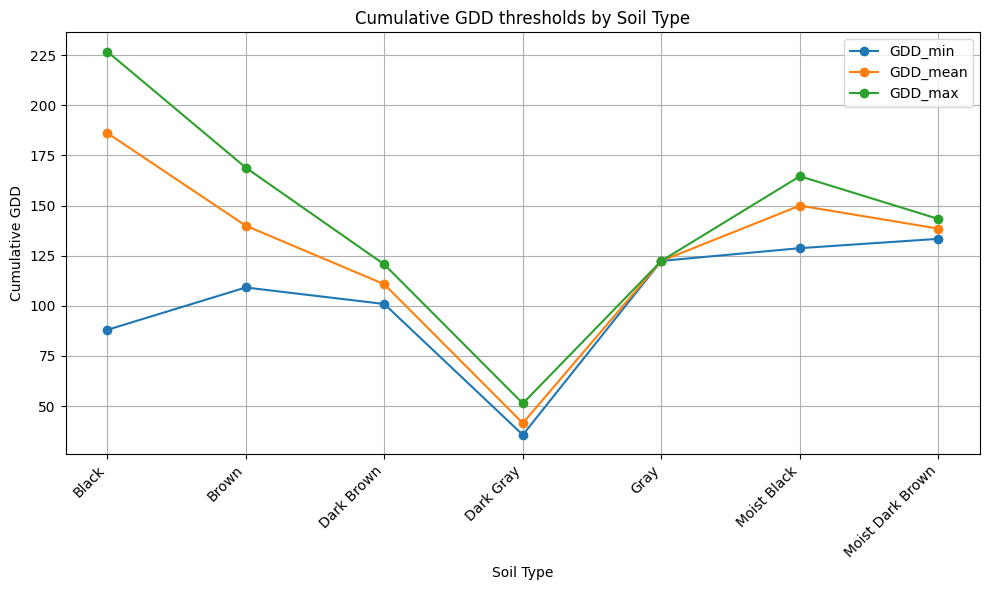

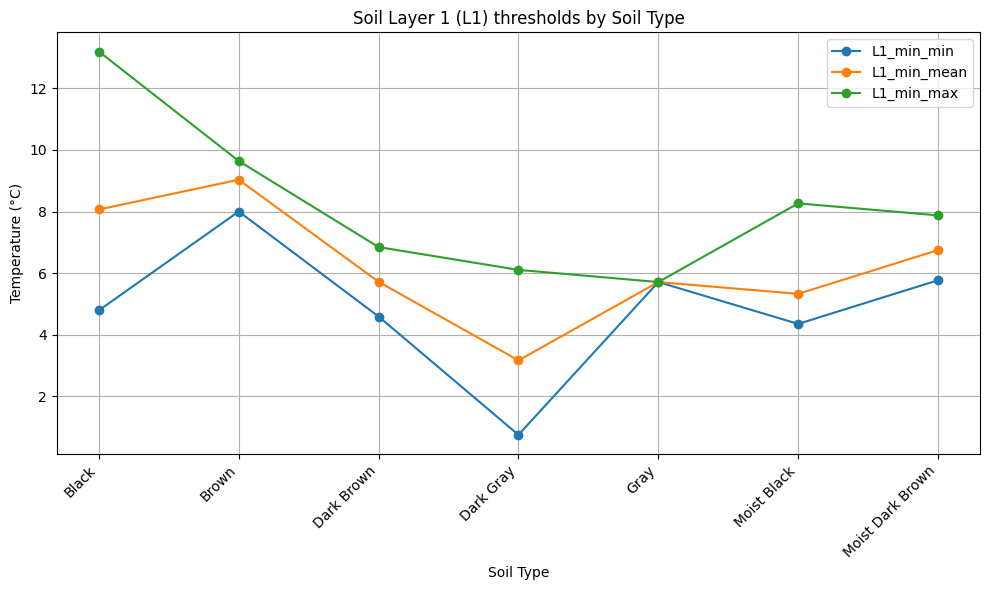

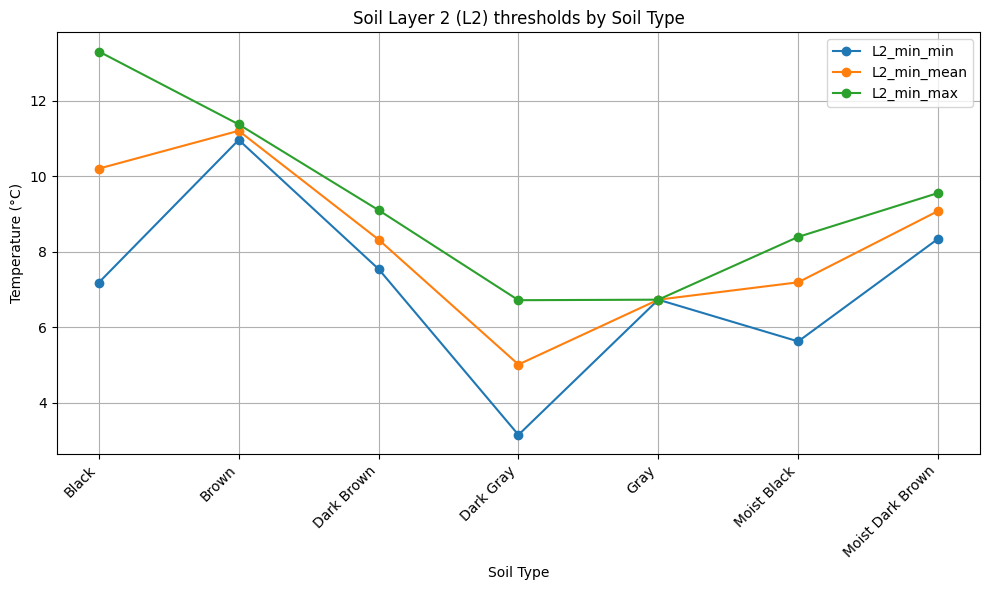

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

soil_thresholds_final = soil_thresholds.copy()
# First convert dictionary to DataFrame
df_thresholds = pd.DataFrame.from_dict(soil_thresholds_final, orient='index').reset_index()
df_thresholds = df_thresholds.rename(columns={'index': 'SoilType'})

# Set SoilType as categorical for better sorting
df_thresholds['SoilType'] = pd.Categorical(df_thresholds['SoilType'], categories=df_thresholds['SoilType'], ordered=True)

# --- 1. Plot GDD thresholds ---
plt.figure(figsize=(10, 6))
plt.plot(df_thresholds['SoilType'], df_thresholds['Cumulative_GDD_min'], marker='o', label='GDD_min')
plt.plot(df_thresholds['SoilType'], df_thresholds['Cumulative_GDD_mean'], marker='o', label='GDD_mean')
plt.plot(df_thresholds['SoilType'], df_thresholds['Cumulative_GDD_max'], marker='o', label='GDD_max')
plt.title("Cumulative GDD thresholds by Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Cumulative GDD")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 2. Plot Soil_temp_l1 thresholds ---
plt.figure(figsize=(10, 6))
plt.plot(df_thresholds['SoilType'], df_thresholds['Soil_temp_l1_min_min'], marker='o', label='L1_min_min')
plt.plot(df_thresholds['SoilType'], df_thresholds['Soil_temp_l1_min_mean'], marker='o', label='L1_min_mean')
plt.plot(df_thresholds['SoilType'], df_thresholds['Soil_temp_l1_min_max'], marker='o', label='L1_min_max')
plt.title("Soil Layer 1 (L1) thresholds by Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 3. Plot Soil_temp_l2 thresholds ---
plt.figure(figsize=(10, 6))
plt.plot(df_thresholds['SoilType'], df_thresholds['Soil_temp_l2_min_min'], marker='o', label='L2_min_min')
plt.plot(df_thresholds['SoilType'], df_thresholds['Soil_temp_l2_min_mean'], marker='o', label='L2_min_mean')
plt.plot(df_thresholds['SoilType'], df_thresholds['Soil_temp_l2_min_max'], marker='o', label='L2_min_max')
plt.title("Soil Layer 2 (L2) thresholds by Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [82]:
df_climate_altered

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-1-E1,1987-04-01,0.000000,-1.272552,-1.172211,-1.207642,-0.684418,-0.658295,-0.672455,Moist Black,1987,0.000000
1,1-1-E1,1987-04-02,0.000000,-1.349457,-1.167816,-1.263977,-0.715179,-0.684906,-0.698578,Moist Black,1987,0.000000
2,1-1-E1,1987-04-03,0.000000,-1.357513,-1.247162,-1.298187,-0.743988,-0.716644,-0.729431,Moist Black,1987,0.000000
3,1-1-E1,1987-04-04,2.092224,-1.267914,-1.041107,-1.188080,-0.760345,-0.746918,-0.754333,Moist Black,1987,2.092224
4,1-1-E1,1987-04-05,4.157913,-1.002533,0.300446,-0.692078,-0.760101,-0.726898,-0.750580,Moist Black,1987,6.250137
...,...,...,...,...,...,...,...,...,...,...,...,...
61128239,S-L-WS,2024-10-27,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128240,S-L-WS,2024-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128241,S-L-WS,2024-10-29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439
61128242,S-L-WS,2024-10-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Black,2024,1767.053439


#### Get the dataframe for 10 locations

In [83]:
# Filter the dataframe for 2024
df_climate_2024 = df_climate_altered[df_climate_altered['Year']==2024]

In [84]:
df_10_actual_test_list = df_10_actual_test['Township'].unique()

In [85]:
df_10_actual_test_list

array(['1-27-W1', '1-28-W1', '26-1-W4', '14-22-W2', '73-20-W5',
       '82-22-W5', '50-15-W3', '43-25-W2', '54-23-W4', '11-11-W2'],
      dtype=object)

In [86]:
# Get the dataframe for the 10 locations
df_climate_2024_10_loc = df_climate_2024[df_climate_2024['Township'].isin(df_10_actual_test_list)].reset_index(drop=True)
df_climate_2024_10_loc

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-27-W1,2024-04-01,0.000000,-1.266693,0.478424,-0.589172,-1.238617,-1.150970,-1.198639,Black,2024,0.000000
1,1-27-W1,2024-04-02,0.000000,-0.303070,4.802399,0.800293,-1.142181,-0.921967,-1.057190,Black,2024,0.000000
2,1-27-W1,2024-04-03,0.000000,-0.621429,6.662994,1.202972,-0.900726,-0.689301,-0.829712,Black,2024,0.000000
3,1-27-W1,2024-04-04,0.795731,-0.166595,7.983795,2.128876,-0.660492,-0.388031,-0.571472,Black,2024,0.795731
4,1-27-W1,2024-04-05,2.485580,0.223541,9.156647,3.178314,-0.354340,0.016510,-0.235474,Black,2024,3.281311
...,...,...,...,...,...,...,...,...,...,...,...,...
2135,82-22-W5,2024-10-27,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032
2136,82-22-W5,2024-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032
2137,82-22-W5,2024-10-29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032
2138,82-22-W5,2024-10-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032


In [87]:
df_climate_2024_10_loc.columns

Index(['Township', 'Date', 'GDD', 'Soil_temp_l1_min', 'Soil_temp_l1_max',
       'Soil_temp_l1_mean', 'Soil_temp_l2_min', 'Soil_temp_l2_max',
       'Soil_temp_l2_mean', 'SoilType', 'Year', 'Cumulative_GDD'],
      dtype='object')

#### Find seeding dates for the 10 locations

In [88]:
import pandas as pd

# Ensure datetime and year columns
df_climate_2024_10_loc['Date'] = pd.to_datetime(df_climate_2024_10_loc['Date'])
df_climate_2024_10_loc['Year'] = df_climate_2024_10_loc['Date'].dt.year

# === Define function ===
def detect_seeding_dates(df_climate, soil_thresholds, gdd_key, l1_key, l2_key):
    """
    Detects seeding dates based on selected GDD, soil temperature L1 and L2 thresholds.

    Args:
        df_climate (pd.DataFrame): Climate data.
        soil_thresholds (dict): Thresholds by soil type.
        gdd_key (str): Which GDD threshold to use ('Cumulative_GDD_min', '_mean', '_max').
        l1_key (str): Which Soil Layer 1 threshold to use.
        l2_key (str): Which Soil Layer 2 threshold to use.

    Returns:
        pd.DataFrame: Seeding dates.
    """

    seeding_results = []

    for soil_type in df_climate['SoilType'].dropna().unique():
        if soil_type not in soil_thresholds:
            continue  # Skip unknown soil types

        thresholds = soil_thresholds[soil_type]
        df_soil = df_climate[df_climate['SoilType'] == soil_type]

        def process_group(group):
            group = group.sort_values('Date').copy()

            # Apply selected thresholds
            condition_met = group[
                (group['Cumulative_GDD'] >= thresholds[gdd_key]) &
                (group['Soil_temp_l1_min'] >= thresholds[l1_key]) &
                (group['Soil_temp_l2_min'] >= thresholds[l2_key])
                
            ]

            if condition_met.empty:
                return pd.Series({'Seeding_Date': pd.NaT})

            seeding_date = condition_met.iloc[0]['Date']

            # Clip to April 20 - June 15
            year = seeding_date.year
            seeding_date_clipped = max(min(seeding_date, pd.Timestamp(year, 6, 15)), pd.Timestamp(year, 4, 20))

            return pd.Series({'Seeding_Date': seeding_date_clipped})

        # Apply to Township-Year groups
        results = (
            df_soil.groupby(['Township', 'Year'])
            .apply(process_group)
            .reset_index()
        )

        results['SoilType'] = soil_type
        results['CropType'] = "Canola"
        results['Seeding_DOY'] = results['Seeding_Date'].apply(
            lambda d: (d - pd.Timestamp(d.year, 1, 1)).days if pd.notnull(d) else None
        )

        seeding_results.append(results)

    return pd.concat(seeding_results, ignore_index=True)


In [89]:
import pandas as pd
import os
# --- Step 2: Setup  combinations ---

combinations = [
    {
        "name": "min_min_min",
        "gdd_key": "Cumulative_GDD_min",
        "l1_key": "Soil_temp_l1_min_min",
        "l2_key": "Soil_temp_l2_min_min"
    },
    {
        "name": "mean_mean_mean",
        "gdd_key": "Cumulative_GDD_mean",
        "l1_key": "Soil_temp_l1_min_mean",
        "l2_key": "Soil_temp_l2_min_mean"
    },
    {
        "name": "max_max_max",
        "gdd_key": "Cumulative_GDD_max",
        "l1_key": "Soil_temp_l1_min_max",
        "l2_key": "Soil_temp_l2_min_max"
    },
    {
        "name": "mean_min_min",
        "gdd_key": "Cumulative_GDD_mean",
        "l1_key": "Soil_temp_l1_min_min",
        "l2_key": "Soil_temp_l2_min_min"
    },
    {
        "name": "min_mean_mean",
        "gdd_key": "Cumulative_GDD_min",
        "l1_key": "Soil_temp_l1_min_mean",
        "l2_key": "Soil_temp_l2_min_mean"
    },
]

# --- Step 3: Run and Save ---

# Create output folder if not exist
output_folder = "/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations"
os.makedirs(output_folder, exist_ok=True)

for combo in combinations:
    df_result = detect_seeding_dates(
        df_climate_2024_10_loc,
        soil_thresholds,
        gdd_key=combo["gdd_key"],
        l1_key=combo["l1_key"],
        l2_key=combo["l2_key"]
    )

    file_path = os.path.join(output_folder, f"seeding_dates_{combo['name']}.csv")
    df_result.to_csv(file_path, index=False)

    print(f"Saved: {file_path}")


Saved: /Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations/seeding_dates_min_min_min.csv
Saved: /Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations/seeding_dates_mean_mean_mean.csv
Saved: /Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations/seeding_dates_max_max_max.csv
Saved: /Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations/seeding_dates_mean_min_min.csv
Saved: /Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations/seeding_dates_min_mean_mean.csv


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3141684982.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3141684982.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3141684982.

#### Get the error analysis

In [90]:
df_10_actual_test = df_10_actual_test.reset_index(drop=True)
df_10_actual_test

,Township,Seeding_date_numeric,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-27-W1,143.0,2024-05-22,5.745422,8.075592,18.485992,13.687439,11.412750,14.216217,12.841919,Black,2024,216.767592
1,1-28-W1,143.0,2024-05-22,5.821243,7.999420,18.624664,13.660187,11.436188,14.288483,12.890076,Black,2024,220.353361
2,26-1-W4,136.0,2024-05-15,8.076172,8.909332,20.330230,13.833557,11.196930,13.707184,12.511047,Brown,2024,138.280640
3,14-22-W2,137.0,2024-05-16,7.578262,10.132233,19.354645,14.170319,12.106598,14.072662,13.085327,Dark Brown,2024,185.514647
4,73-20-W5,124.0,2024-05-03,2.601395,0.839020,12.570953,6.663818,3.383697,5.468170,4.452972,Dark Gray,2024,39.454711
5,82-22-W5,127.0,2024-05-06,6.450424,4.531158,15.667145,10.040985,5.996246,8.037506,7.120544,Dark Gray,2024,47.520753
6,50-15-W3,150.0,2024-05-29,9.587281,12.497467,18.369050,14.479553,11.882721,12.764801,12.285034,Gray,2024,149.681351
7,43-25-W2,139.0,2024-05-18,3.778473,8.299469,13.703766,10.050476,8.524811,9.950104,9.141022,Moist Black,2024,139.557923
8,54-23-W4,142.0,2024-05-20,1.114579,4.294586,9.125153,6.263245,4.541412,5.444244,5.023254,Moist Black,2024,113.533631
9,11-11-W2,134.0,2024-05-13,6.465607,8.016998,17.455475,11.895691,9.855377,13.103912,11.276245,Moist Dark Brown,2024,132.340059


In [91]:
# Assuming you have your actual seeding dates dataframe already:
df_actual_seeding = df_10_actual_test

# Make sure Year is integer
df_actual_seeding['Year'] = df_actual_seeding['Year'].astype(int)


In [93]:
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error

# Where you saved the prediction CSVs
prediction_folder = output_folder  # Make sure this is correctly defined

# List all your saved CSVs
prediction_files = [f for f in os.listdir(prediction_folder) if f.endswith(".csv")]

# Store MAE results
mae_results = []

# Check the columns in the df_actual_seeding
print(df_actual_seeding.columns)

# Loop through each prediction file
for file in prediction_files:
    # Load prediction
    df_pred = pd.read_csv(os.path.join(prediction_folder, file))
    
    # Clean column names by stripping any extra spaces
    df_pred.columns = df_pred.columns.str.strip()
    df_actual_seeding.columns = df_actual_seeding.columns.str.strip()

    # Check if the necessary columns exist in both DataFrames
    if 'Township' not in df_pred.columns or 'Year' not in df_pred.columns:
        print(f"Skipping {file}: 'Township' or 'Year' not in prediction file columns")
        continue
    if 'Township' not in df_actual_seeding.columns or 'Year' not in df_actual_seeding.columns:
        print(f"Skipping {file}: 'Township' or 'Year' not in actual seeding file columns")
        continue
    
    # Merge with actual
    df_merge = pd.merge(
        df_pred,
        df_actual_seeding[['Township', 'Year', 'Seeding_date_numeric']],
        on=['Township', 'Year'],
        how='inner'
    )
    
    # Calculate MAE
    mae = mean_absolute_error(
        df_merge['Seeding_date_numeric'],
        df_merge['Seeding_DOY']
    )
    
    # Save the result
    mae_results.append({
        "Combination": file.replace(".csv", ""),
        "MAE": mae
    })

# Create summary DataFrame
df_mae_summary = pd.DataFrame(mae_results)

# Sort by best (lowest MAE)
df_mae_summary = df_mae_summary.sort_values(by="MAE")


print(df_mae_summary)


Index(['Township', 'Seeding_date_numeric', 'Date', 'GDD', 'Soil_temp_l1_min',
       'Soil_temp_l1_max', 'Soil_temp_l1_mean', 'Soil_temp_l2_min',
       'Soil_temp_l2_max', 'Soil_temp_l2_mean', 'SoilType', 'Year',
       'Cumulative_GDD'],
      dtype='object')
Skipping mae_results_grid_search.csv: 'Township' or 'Year' not in prediction file columns
                    Combination  MAE
3    seeding_dates_mean_min_min  3.8
1  seeding_dates_mean_mean_mean  5.2
2   seeding_dates_min_mean_mean  5.4
4     seeding_dates_min_min_min  6.3
0     seeding_dates_max_max_max  6.5


In [ ]:
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error

# Where you saved the prediction CSVs
prediction_folder = output_folder

# List all your saved CSVs
prediction_files = [f for f in os.listdir(prediction_folder) if f.endswith(".csv")]

# Store MAE results
mae_results = []

for file in prediction_files:
    # Load prediction
    df_pred = pd.read_csv(os.path.join(prediction_folder, file))
    
    # Merge with actual
    df_merge = pd.merge(
        df_pred,
        df_actual_seeding[['Township', 'Year', 'Seeding_date_numeric']],
        on=['Township', 'Year'],
        how='inner'
    )
    
    # Calculate MAE
    mae = mean_absolute_error(
        df_merge['Seeding_date_numeric'],
        df_merge['Seeding_DOY']
    )
    
    # Save the result
    mae_results.append({
        "Combination": file.replace(".csv", ""),
        "MAE": mae
    })

# Create summary DataFrame
df_mae_summary = pd.DataFrame(mae_results)

# Sort by best (lowest MAE)
df_mae_summary = df_mae_summary.sort_values(by="MAE")

print(df_mae_summary)


In [109]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/Users/dulminiguruge/Documents/Seeding Date/Dates.xlsx")

# Set the first column as index (Crop names)
df = df.set_index(df.columns[0])

# Extract duration column
durations = df["Duration"]

# Drop duration to parse date ranges separately
df = df.drop(columns=["Duration"])

# Convert to nested dictionary
crop_windows = {}
for crop in df.index:
    crop_windows[crop] = {}
    for soil in df.columns:
        cell = df.loc[crop, soil]
        if pd.isna(cell):
            continue
        try:
            start, end = cell.split('-')
            crop_windows[crop][soil.strip()] = (start.strip(), end.strip())
        except:
            continue
    crop_windows[crop]["Duration"] = durations.loc[crop]

# Preview
from pprint import pprint
pprint(crop_windows)


{'Barley': {'Black': ('05/05', '05/10'),
            'Brown': ('05/05', '05/10'),
            'Dark Brown': ('05/05', '05/10'),
            'Dark Gray': ('05/10', '05/15'),
            'Duration': '90 days',
            'Gray': ('05/05', '05/10'),
            'Moist Black': ('05/05', '05/10'),
            'Moist Dark Brown': ('05/05', '05/10')},
 'Canola': {'Black': ('05/15', '05/25'),
            'Brown': ('04/15', '04/25'),
            'Dark Brown': ('04/25', '05/05'),
            'Dark Gray': ('05/20', '05/30'),
            'Duration': '100 days',
            'Gray': ('05/15', '05/25'),
            'Moist Black': ('05/15', '05/25'),
            'Moist Dark Brown': ('05/07', '05/17')},
 'Lentils, Green': {'Brown': ('05/01', '05/10'),
                    'Dark Brown': ('05/05', '05/10'),
                    'Duration': '90 days',
                    'Moist Dark Brown': ('05/07', '05/17')},
 'Lentils, Red': {'Black': ('05/07', '05/18'),
                  'Brown': ('05/01', '05/10'),
  

In [110]:
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_error

# === Column mapping helpers ===

def get_l1_column(l1_key):
    if 'min_' in l1_key:
        return 'Soil_temp_l1_min'
    elif 'mean_' in l1_key:
        return 'Soil_temp_l1_mean'
    elif 'max_' in l1_key:
        return 'Soil_temp_l1_max'
    else:
        raise ValueError(f"Cannot match L1 key: {l1_key}")

def get_l2_column(l2_key):
    if 'min_' in l2_key:
        return 'Soil_temp_l2_min'
    elif 'mean_' in l2_key:
        return 'Soil_temp_l2_mean'
    elif 'max_' in l2_key:
        return 'Soil_temp_l2_max'
    else:
        raise ValueError(f"Cannot match L2 key: {l2_key}")

# === Seeding date detection function with Dark Gray special case ===

def detect_seeding_dates(df_climate, soil_thresholds, gdd_key, l1_key=None, l2_key=None, canola_windows=None):
    seeding_results = []

    for soil_type in df_climate['SoilType'].dropna().unique():
        if soil_type not in soil_thresholds:
            continue

        thresholds = soil_thresholds[soil_type]
        df_soil = df_climate[df_climate['SoilType'] == soil_type]

        def process_group(group):
            group = group.sort_values('Date').copy()

            # Always check GDD
            condition = (group['Cumulative_GDD'] >= thresholds[gdd_key])

            # Optionally add L1
            if l1_key:
                l1_col = get_l1_column(l1_key)
                condition &= (group[l1_col] >= thresholds[l1_key])

            # Optionally add L2
            if l2_key:
                l2_col = get_l2_column(l2_key)
                condition &= (group[l2_col] >= thresholds[l2_key])

            condition_met = group[condition]

            if condition_met.empty:
                return pd.Series({'Seeding_Date': pd.NaT})

            seeding_date = condition_met.iloc[0]['Date']
            year = seeding_date.year

            # === Use Canola window for Dark Gray only
            if soil_type == "Dark Gray" and canola_windows and "Dark Gray" in canola_windows:
                start_str, end_str = canola_windows["Dark Gray"]
                window_start = pd.to_datetime(f"{year}-{start_str}")
                window_end = pd.to_datetime(f"{year}-{end_str}")
            else:
                window_start = pd.Timestamp(year, 4, 20)
                window_end = pd.Timestamp(year, 6, 15)

            # Clip to valid window
            seeding_date_clipped = min(max(seeding_date, window_start), window_end)

            return pd.Series({'Seeding_Date': seeding_date_clipped})

        results = (
            df_soil.groupby(['Township', 'Year'])
            .apply(process_group)
            .reset_index()
        )

        results['SoilType'] = soil_type
        results['CropType'] = "Canola"
        results['Seeding_DOY'] = results['Seeding_Date'].apply(
            lambda d: (d - pd.Timestamp(d.year, 1, 1)).days if pd.notnull(d) else None
        )

        seeding_results.append(results)

    return pd.concat(seeding_results, ignore_index=True)

# === Forward Feature Selection ===

def forward_feature_selection(df_climate, df_actual, soil_thresholds, canola_windows=None):
    gdd_keys = ['Cumulative_GDD_min', 'Cumulative_GDD_mean', 'Cumulative_GDD_max']
    l1_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]].keys() if k.startswith('Soil_temp_l1')]
    l2_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]].keys() if k.startswith('Soil_temp_l2')]

    best_result = None
    best_gdd_key = None

    for gdd_key in gdd_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=gdd_key, canola_windows=canola_windows)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')
        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if best_result is None or mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_gdd_key = gdd_key

    print(f"Best GDD Key: {best_gdd_key} -> MAE: {best_result['MAE']:.2f}")

    best_l1_key = None
    for l1_key in l1_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=best_gdd_key, l1_key=l1_key, canola_windows=canola_windows)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')
        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_l1_key = l1_key

    print(f"Best L1 Key: {best_l1_key} -> MAE: {best_result['MAE']:.2f}")

    best_l2_key = None
    for l2_key in l2_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=best_gdd_key, l1_key=best_l1_key, l2_key=l2_key, canola_windows=canola_windows)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')
        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_l2_key = l2_key

    print(f"Best L2 Key: {best_l2_key} -> MAE: {best_result['MAE']:.2f}")

    return {
        'Best_GDD': best_gdd_key,
        'Best_L1': best_l1_key,
        'Best_L2': best_l2_key,
        'Final_MAE': best_result['MAE']
    }


In [111]:
result = forward_feature_selection(
    df_climate=df_climate_2024_10_loc,
    df_actual=df_actual_seeding,
    soil_thresholds=soil_thresholds,
    canola_windows=crop_windows["Canola"]
)


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

Best GDD Key: Cumulative_GDD_mean -> MAE: 6.70
Best L1 Key: Soil_temp_l1_min_min -> MAE: 6.60


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

Best L2 Key: None -> MAE: 6.60


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

## Forward feature selection

* Select best GDD	
* Then select best L1	
* Then select best L2	
* Report final best combination + MAE

In [94]:
import pandas as pd
import itertools
from sklearn.metrics import mean_absolute_error

# ==== Helper functions for column mapping ====

def get_l1_column(l1_key):
    if 'min_' in l1_key:
        return 'Soil_temp_l1_min'
    elif 'mean_' in l1_key:
        return 'Soil_temp_l1_mean'
    elif 'max_' in l1_key:
        return 'Soil_temp_l1_max'
    else:
        raise ValueError(f"Cannot match L1 key: {l1_key}")

def get_l2_column(l2_key):
    if 'min_' in l2_key:
        return 'Soil_temp_l2_min'
    elif 'mean_' in l2_key:
        return 'Soil_temp_l2_mean'
    elif 'max_' in l2_key:
        return 'Soil_temp_l2_max'
    else:
        raise ValueError(f"Cannot match L2 key: {l2_key}")

# ==== Seeding detection function ====

def detect_seeding_dates(df_climate, soil_thresholds, gdd_key, l1_key=None, l2_key=None):
    seeding_results = []

    for soil_type in df_climate['SoilType'].dropna().unique():
        if soil_type not in soil_thresholds:
            continue

        thresholds = soil_thresholds[soil_type]
        df_soil = df_climate[df_climate['SoilType'] == soil_type]

        def process_group(group):
            group = group.sort_values('Date').copy()

            # Always check GDD
            condition = (group['Cumulative_GDD'] >= thresholds[gdd_key])

            # Optionally add L1
            if l1_key:
                l1_col = get_l1_column(l1_key)
                condition = condition & (group[l1_col] >= thresholds[l1_key])

            # Optionally add L2
            if l2_key:
                l2_col = get_l2_column(l2_key)
                condition = condition & (group[l2_col] >= thresholds[l2_key])

            condition_met = group[condition]

            if condition_met.empty:
                return pd.Series({'Seeding_Date': pd.NaT})

            seeding_date = condition_met.iloc[0]['Date']
            year = seeding_date.year
            seeding_date_clipped = max(min(seeding_date, pd.Timestamp(year, 6, 15)), pd.Timestamp(year, 4, 20))

            return pd.Series({'Seeding_Date': seeding_date_clipped})

        results = (
            df_soil.groupby(['Township', 'Year'])
            .apply(process_group)
            .reset_index()
        )

        results['SoilType'] = soil_type
        results['CropType'] = "Canola"
        results['Seeding_DOY'] = results['Seeding_Date'].apply(
            lambda d: (d - pd.Timestamp(d.year, 1, 1)).days if pd.notnull(d) else None
        )

        seeding_results.append(results)

    return pd.concat(seeding_results, ignore_index=True)

# ==== Forward Feature Selection ====

def forward_feature_selection(df_climate, df_actual, soil_thresholds):
    # Step 1: Best GDD
    gdd_keys = ['Cumulative_GDD_min', 'Cumulative_GDD_mean', 'Cumulative_GDD_max']
    l1_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]].keys() if k.startswith('Soil_temp_l1')]
    l2_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]].keys() if k.startswith('Soil_temp_l2')]

    best_result = None
    best_gdd_key = None

    for gdd_key in gdd_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=gdd_key)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')

        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if best_result is None or mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_gdd_key = gdd_key

    print(f"Best GDD Key: {best_gdd_key} -> MAE: {best_result['MAE']:.2f}")

    # Step 2: Best L1 with best GDD
    best_l1_key = None
    for l1_key in l1_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=best_gdd_key, l1_key=l1_key)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')

        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if best_result is None or mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_l1_key = l1_key

    print(f"Best L1 Key: {best_l1_key} -> MAE: {best_result['MAE']:.2f}")

    # Step 3: Best L2 with best GDD + L1
    best_l2_key = None
    for l2_key in l2_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=best_gdd_key, l1_key=best_l1_key, l2_key=l2_key)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')

        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if best_result is None or mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_l2_key = l2_key

    print(f"Best L2 Key: {best_l2_key} -> MAE: {best_result['MAE']:.2f}")

    # Final result
    final_result = {
        'Best_GDD': best_gdd_key,
        'Best_L1': best_l1_key,
        'Best_L2': best_l2_key,
        'Final_MAE': best_result['MAE']
    }

    return final_result


In [95]:
final_result = forward_feature_selection(
    df_climate_2024_10_loc, 
    df_actual_seeding, 
    soil_thresholds_final
)

print("\n=== Best Thresholds Found ===")
print(final_result)


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3109515585.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3109515585.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3109515585.

Best GDD Key: Cumulative_GDD_mean -> MAE: 3.90
Best L1 Key: Soil_temp_l1_min_min -> MAE: 3.80
Best L2 Key: None -> MAE: 3.80

=== Best Thresholds Found ===
{'Best_GDD': 'Cumulative_GDD_mean', 'Best_L1': 'Soil_temp_l1_min_min', 'Best_L2': None, 'Final_MAE': 3.8}


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3109515585.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3109515585.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/3109515585.

### Run the forward selection to get the visualization

In [112]:
import matplotlib.pyplot as plt

def forward_feature_selection_with_plot(df_climate, df_actual, soil_thresholds):
    gdd_keys = ['Cumulative_GDD_min', 'Cumulative_GDD_mean', 'Cumulative_GDD_max']
    l1_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]].keys() if k.startswith('Soil_temp_l1')]
    l2_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]].keys() if k.startswith('Soil_temp_l2')]

    mae_steps = []
    labels_steps = []

    best_result = None
    best_gdd_key = None

    # Step 1: Best GDD
    for gdd_key in gdd_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=gdd_key)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')
        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if best_result is None or mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_gdd_key = gdd_key

    mae_steps.append(best_result['MAE'])
    labels_steps.append(f"GDD: {best_gdd_key}")

    print(f"Step 1 - Best GDD: {best_gdd_key} -> MAE: {best_result['MAE']:.2f}")

    # Step 2: Best L1 with best GDD
    best_l1_key = None
    for l1_key in l1_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=best_gdd_key, l1_key=l1_key)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')
        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_l1_key = l1_key

    mae_steps.append(best_result['MAE'])
    labels_steps.append(f"GDD+L1: {best_l1_key}")

    print(f"Step 2 - Best L1: {best_l1_key} -> MAE: {best_result['MAE']:.2f}")

    # Step 3: Best L2 with best GDD + L1
    best_l2_key = None
    for l2_key in l2_keys:
        df_pred = detect_seeding_dates(df_climate, soil_thresholds, gdd_key=best_gdd_key, l1_key=best_l1_key, l2_key=l2_key)
        df_merge = pd.merge(df_pred, df_actual[['Township', 'Year', 'Seeding_date_numeric']], on=['Township', 'Year'], how='inner')
        mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])

        if mae < best_result['MAE']:
            best_result = {'MAE': mae}
            best_l2_key = l2_key

    mae_steps.append(best_result['MAE'])
    labels_steps.append(f"GDD+L1+L2: {best_l2_key}")

    print(f"Step 3 - Best L2: {best_l2_key} -> MAE: {best_result['MAE']:.2f}")

    # Final result
    final_result = {
        'Best_GDD': best_gdd_key,
        'Best_L1': best_l1_key,
        'Best_L2': best_l2_key,
        'Final_MAE': best_result['MAE']
    }

    # ==== Plotting ====
    plt.figure(figsize=(8,5))
    plt.plot(labels_steps, mae_steps, marker='o', linestyle='-')
    plt.title('Forward Feature Selection - MAE Improvement')
    plt.xlabel('Feature Combination')
    plt.ylabel('Mean Absolute Error (days)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return final_result


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

Step 1 - Best GDD: Cumulative_GDD_mean -> MAE: 3.90
Step 2 - Best L1: Soil_temp_l1_min_min -> MAE: 3.80


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

Step 3 - Best L2: None -> MAE: 3.80


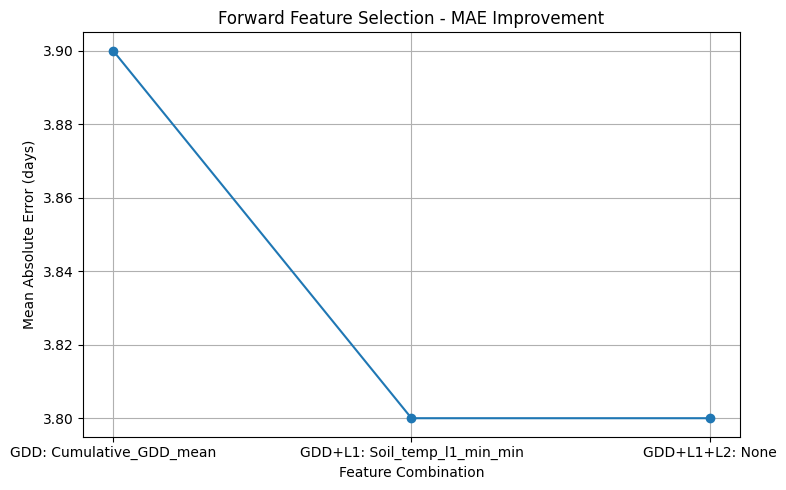


=== Best Thresholds Selected ===
{'Best_GDD': 'Cumulative_GDD_mean', 'Best_L1': 'Soil_temp_l1_min_min', 'Best_L2': None, 'Final_MAE': 3.8}


In [113]:
final_result = forward_feature_selection_with_plot(
    df_climate_2024_10_loc, 
    df_actual_seeding, 
    soil_thresholds_final
)

print("\n=== Best Thresholds Selected ===")
print(final_result)


### Full selection pace

In [114]:
def full_grid_search(df_climate, df_actual, soil_thresholds, canola_windows):
    gdd_keys = ['Cumulative_GDD_min', 'Cumulative_GDD_mean', 'Cumulative_GDD_max']
    l1_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]] if k.startswith("Soil_temp_l1")]
    l2_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]] if k.startswith("Soil_temp_l2")]

    results = []

    for gdd_key, l1_key, l2_key in itertools.product(gdd_keys, l1_keys, l2_keys):
        df_pred = detect_seeding_dates(
            df_climate=df_climate,
            soil_thresholds=soil_thresholds,
            gdd_key=gdd_key,
            l1_key=l1_key,
            l2_key=l2_key,
            canola_windows=canola_windows  # Pass crop window for Dark Gray
        )

        df_merge = pd.merge(
            df_pred,
            df_actual[['Township', 'Year', 'Seeding_date_numeric']],
            on=['Township', 'Year'],
            how='inner'
        )

        if not df_merge.empty:
            mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])
        else:
            mae = float('inf')

        results.append({
            "GDD_key": gdd_key,
            "L1_key": l1_key,
            "L2_key": l2_key,
            "MAE": mae
        })

    df_results = pd.DataFrame(results).sort_values(by="MAE")
    # df_results.to_csv("mae_results_grid_search.csv", index=False)
    print("✅ Grid search complete")

    return df_results.iloc[0]  # Return best result


In [115]:
best_combo = full_grid_search(
    df_climate=df_climate_2024_10_loc,
    df_actual=df_actual_seeding,
    soil_thresholds=soil_thresholds,
    canola_windows=crop_windows["Canola"]
)


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

✅ Grid search complete


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/823710536.py:

In [116]:
best_combo

GDD_key      Cumulative_GDD_min
L1_key     Soil_temp_l1_min_min
L2_key     Soil_temp_l2_max_max
MAE                         6.3
Name: 4, dtype: object

In [106]:
def full_grid_search(df_climate, df_actual, soil_thresholds):
    gdd_keys = ['Cumulative_GDD_min', 'Cumulative_GDD_mean', 'Cumulative_GDD_max']
    l1_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]] if k.startswith("Soil_temp_l1")]
    l2_keys = [k for k in soil_thresholds[list(soil_thresholds.keys())[0]] if k.startswith("Soil_temp_l2")]

    results = []

    for gdd_key, l1_key, l2_key in itertools.product(gdd_keys, l1_keys, l2_keys):
        df_pred = detect_seeding_dates(
            df_climate, soil_thresholds,
            gdd_key=gdd_key,
            l1_key=l1_key,
            l2_key=l2_key
        )

        df_merge = pd.merge(
            df_pred,
            df_actual[['Township', 'Year', 'Seeding_date_numeric']],
            on=['Township', 'Year'],
            how='inner'
        )

        if not df_merge.empty:
            mae = mean_absolute_error(df_merge['Seeding_date_numeric'], df_merge['Seeding_DOY'])
        else:
            mae = float('inf')

        results.append({
            "GDD_key": gdd_key,
            "L1_key": l1_key,
            "L2_key": l2_key,
            "MAE": mae
        })

    # Turn into DataFrame and return best result
    df_results = pd.DataFrame(results).sort_values(by="MAE")
    #df_results.to_csv("/Users/dulminiguruge/Documents/GitHub/seeding-date-detection/2024-season/data/processed/seeding_results_10_locations/mae_results_grid_search.csv", index=False)
    print("✅ Saved to mae_results_grid_search.csv")
    
    return df_results.iloc[0]  # Best combination


     

In [107]:
df_climate_2024_10_loc

,Township,Date,GDD,Soil_temp_l1_min,Soil_temp_l1_max,Soil_temp_l1_mean,Soil_temp_l2_min,Soil_temp_l2_max,Soil_temp_l2_mean,SoilType,Year,Cumulative_GDD
0,1-27-W1,2024-04-01,0.000000,-1.266693,0.478424,-0.589172,-1.238617,-1.150970,-1.198639,Black,2024,0.000000
1,1-27-W1,2024-04-02,0.000000,-0.303070,4.802399,0.800293,-1.142181,-0.921967,-1.057190,Black,2024,0.000000
2,1-27-W1,2024-04-03,0.000000,-0.621429,6.662994,1.202972,-0.900726,-0.689301,-0.829712,Black,2024,0.000000
3,1-27-W1,2024-04-04,0.795731,-0.166595,7.983795,2.128876,-0.660492,-0.388031,-0.571472,Black,2024,0.795731
4,1-27-W1,2024-04-05,2.485580,0.223541,9.156647,3.178314,-0.354340,0.016510,-0.235474,Black,2024,3.281311
...,...,...,...,...,...,...,...,...,...,...,...,...
2135,82-22-W5,2024-10-27,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032
2136,82-22-W5,2024-10-28,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032
2137,82-22-W5,2024-10-29,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032
2138,82-22-W5,2024-10-30,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,Dark Gray,2024,1492.173032


In [108]:
best_combo = full_grid_search(df_climate_2024_10_loc, df_10_actual_test, soil_thresholds)
print("\n=== Best Combination ===")
print(best_combo)


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.

✅ Saved to mae_results_grid_search.csv

=== Best Combination ===
GDD_key      Cumulative_GDD_min
L1_key     Soil_temp_l1_min_min
L2_key     Soil_temp_l2_max_max
MAE                         3.7
Name: 4, dtype: object


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.

In [102]:
# === Set best selected keys ===
gdd_key_best = 'Cumulative_GDD_min'
l1_key_best = 'Soil_temp_l1_min_min'
l2_key_best = 'Soil_temp_l2_max_max'

# === Predict seeding dates using the best thresholds ===
df_best_pred = detect_seeding_dates(
    df_climate_2024_10_loc,
    soil_thresholds,
    gdd_key=gdd_key_best,
    l1_key=l1_key_best,
    l2_key=l2_key_best
)

# === Merge with actual seeding dates ===
df_best_merge = pd.merge(
    df_best_pred,
    df_10_actual_test[['Township', 'Year', 'Seeding_date_numeric']],
    on=['Township', 'Year'],
    how='inner'
)

# === Calculate MAE ===
from sklearn.metrics import mean_absolute_error

best_mae = mean_absolute_error(df_best_merge['Seeding_date_numeric'], df_best_merge['Seeding_DOY'])

print(f"\n✅ Final MAE using best combination: {best_mae:.2f} days")



✅ Final MAE using best combination: 3.70 days


/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_soil.groupby(['Township', 'Year'])
/var/folders/99/2jl1fb4j1h1dzrmy179h293c0000gn/T/ipykernel_20559/2791863066.